# Prodigy Infotech_Task-3_Bank-Marketing-Analysis

<b><i>Name- Mahdi Ismail Laskar</b></i><br>

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).
  

In [34]:
!pip install imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ------ -------------------------------- 41.0/235.6 kB 991.0 kB/s eta 0:00:01
   ------------------------ --------------- 143.4/235.6 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 235.6/235.6 kB 2.1 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.linear_model import LogisticRegression

In [4]:
df= pd.read_csv(r"C:\Users\MAHDI ISMAIL\Downloads\Compressed\bank+marketing\bank-additional\bank-additional\bank-additional-full.csv",sep=";")

print(df.shape) # prints data shape
print(df.columns) # print columns
df.head()

(41188, 21)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Target Variable
y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

In [5]:
class UnderstandingData:
    
    def __init__(self, raw_df):
        self.raw_df = raw_df
        self.raw_df_grouped = raw_df.groupby("y")
        self.class_name_no = "no"
        self.class_name_yes = "yes"
        self.raw_df_grouped_no = self.raw_df_grouped.get_group(self.class_name_no)
        self.raw_df_grouped_yes = self.raw_df_grouped.get_group(self.class_name_yes)

    def plot_histogram_continuous(self, feature_name, bin_size):
        plt.figure()
        plt.hist(self.raw_df_grouped_no[feature_name], bins=bin_size, label=self.class_name_no)
        plt.hist(self.raw_df_grouped_yes[feature_name], bins=bin_size, label=self.class_name_yes)
        plt.legend()
        plt.title("Feature Histogram - "+feature_name)
        plt.xlabel("Feature values")
        plt.ylabel("Count")

    def plot_histogram_categorical(self, feature_name):
        feature_df = pd.DataFrame()
        feature_df["no"] = self.raw_df_grouped_no[feature_name].value_counts()
        feature_df["yes"] = self.raw_df_grouped_yes[feature_name].value_counts()
        
        feature_df.plot(kind='bar')
        plt.title("Feature Histogram - "+feature_name)
        plt.ylabel("Count")
        plt.xlabel("Feature unique values")
        plt.tight_layout()


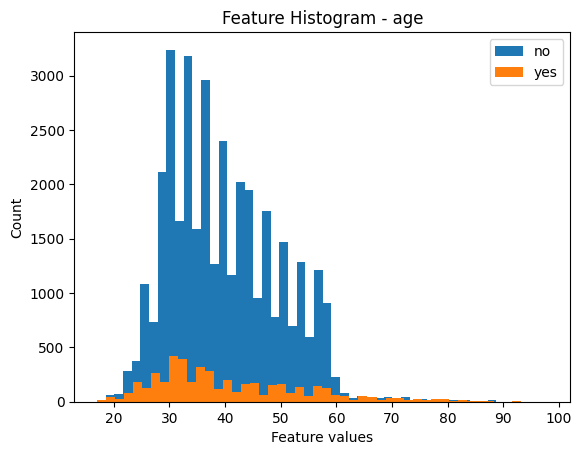

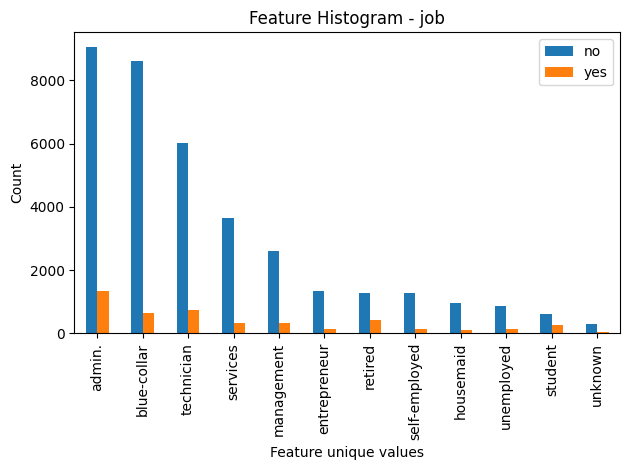

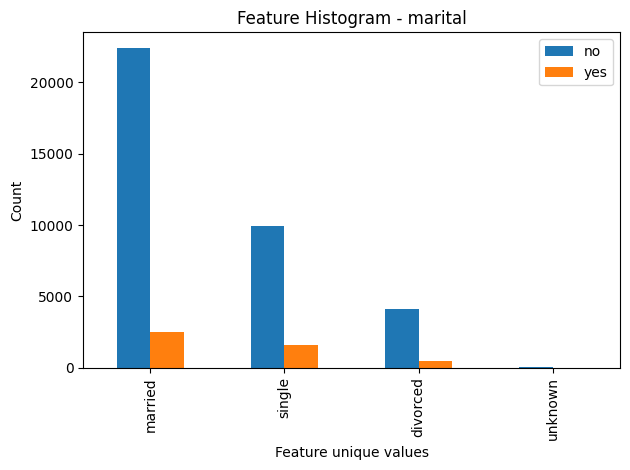

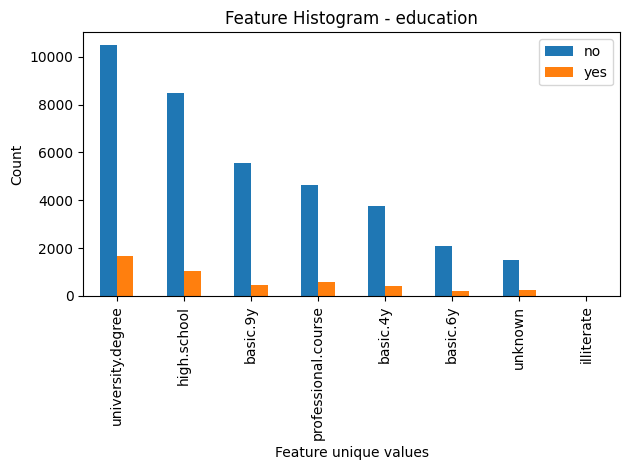

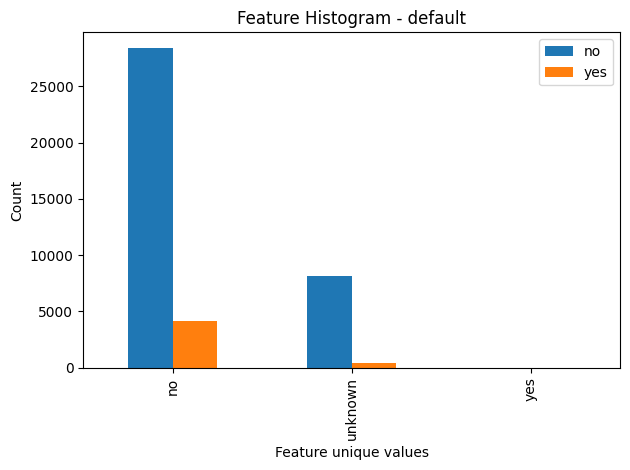

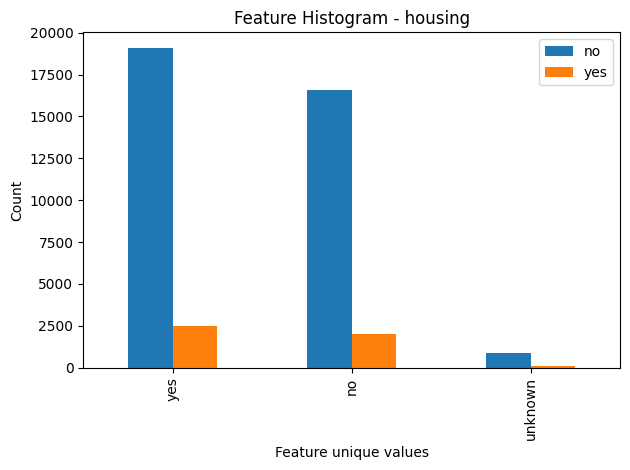

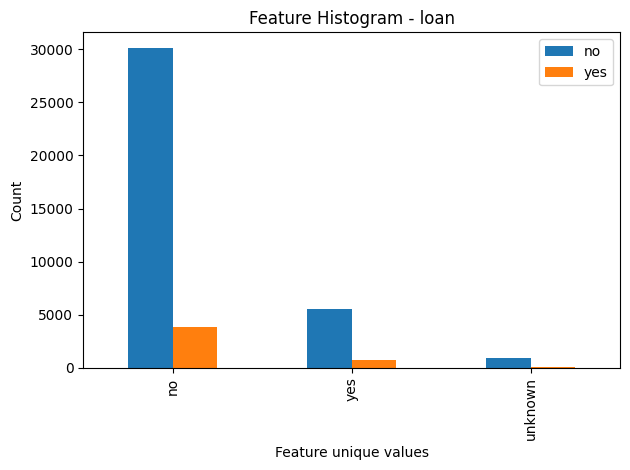

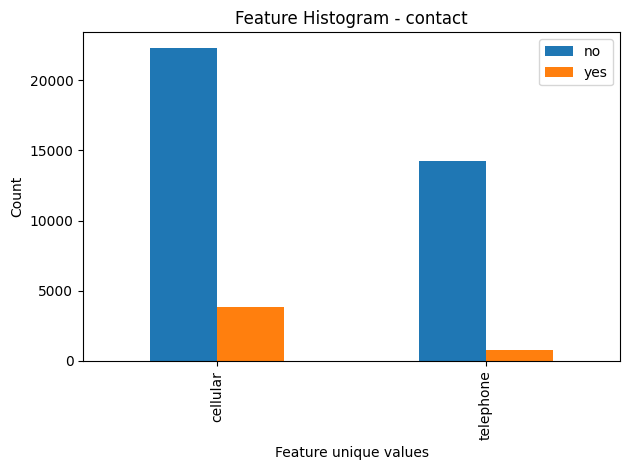

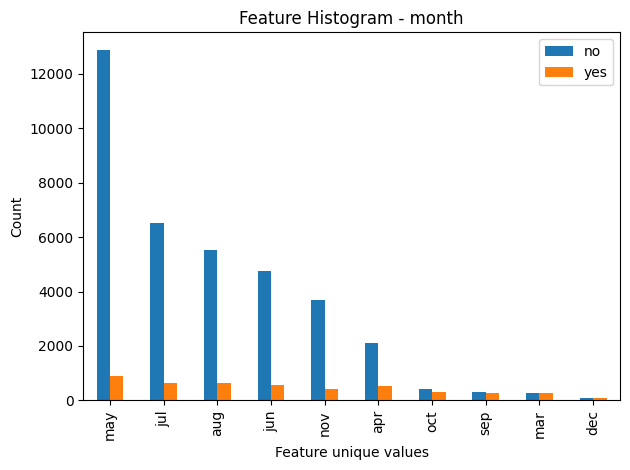

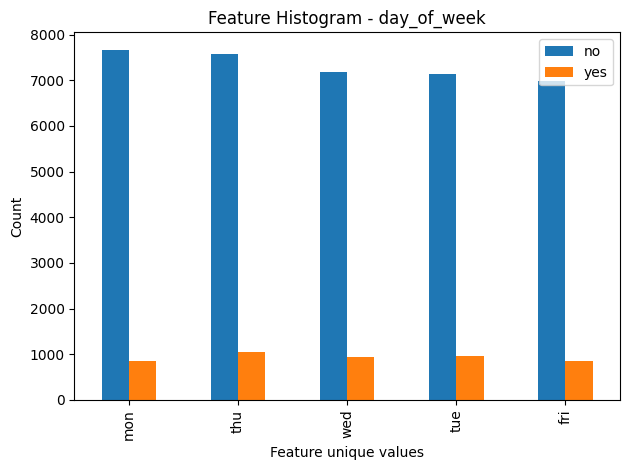

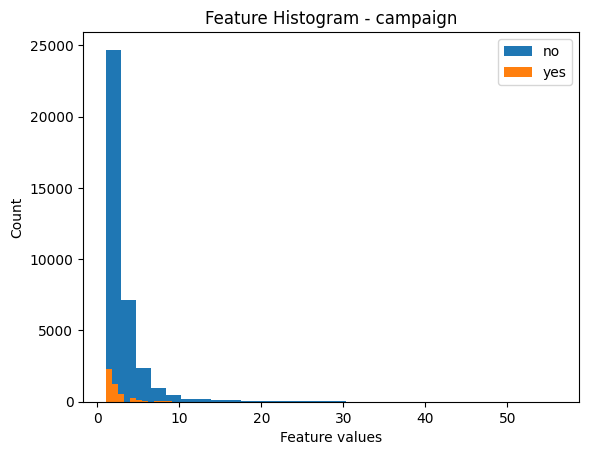

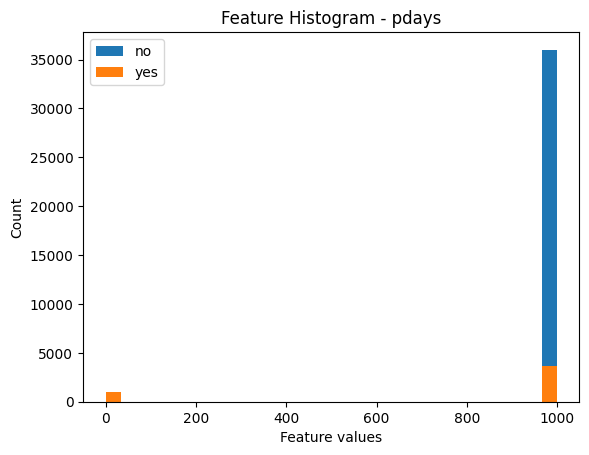

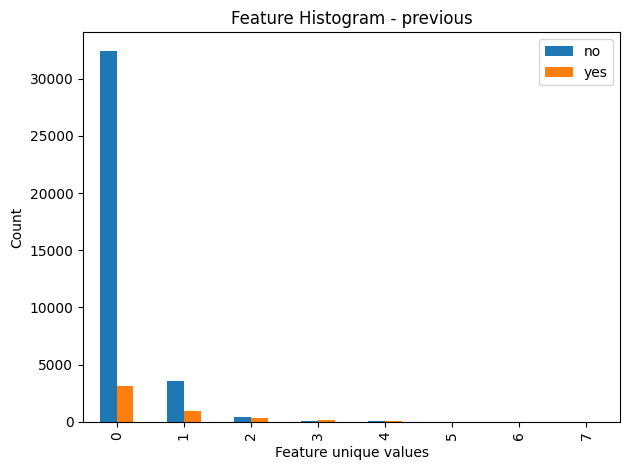

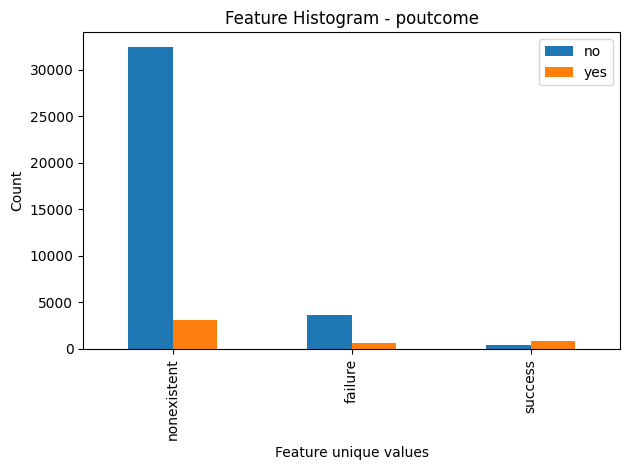

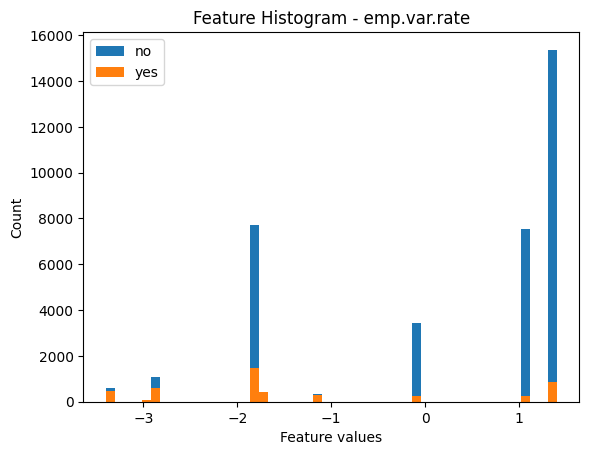

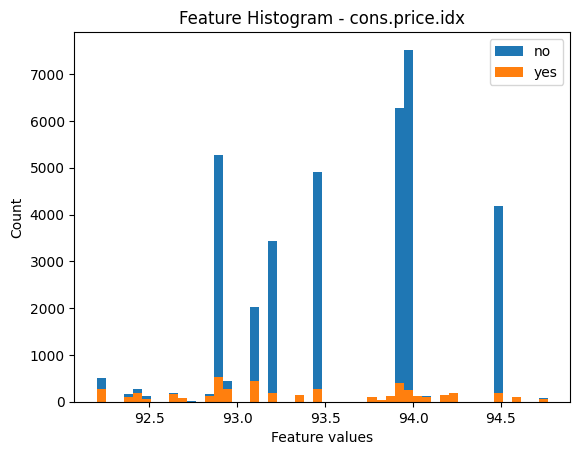

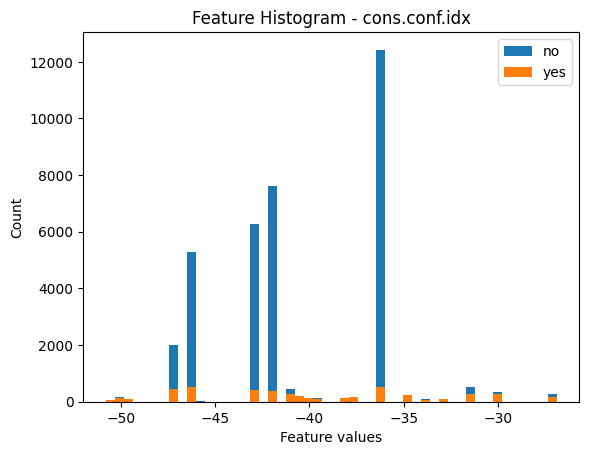

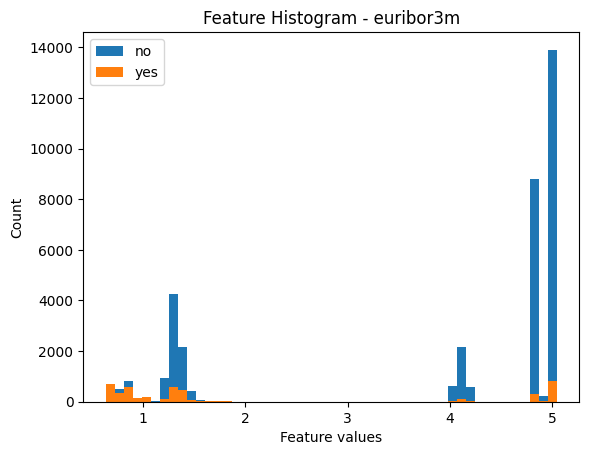

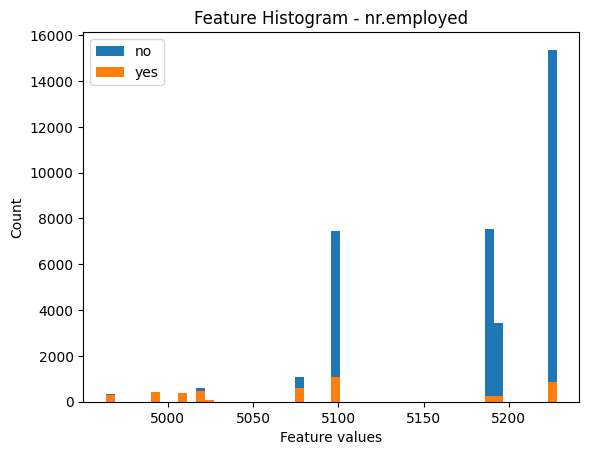

In [6]:
understanding_data = UnderstandingData(df)

### Feature 1 - AGE
understanding_data.plot_histogram_continuous("age", 50)

### Feature 2 - JOB
understanding_data.plot_histogram_categorical("job")

### Feature 3 - MARITAL
understanding_data.plot_histogram_categorical("marital")

### Feature 4 - EDUCATION
understanding_data.plot_histogram_categorical("education")

### Feature 5 - DEFAULT
understanding_data.plot_histogram_categorical("default")

### Feature 6 - HOUSING
understanding_data.plot_histogram_categorical("housing")

### Feature 7 - LOAN
understanding_data.plot_histogram_categorical("loan")

### Feature 8 - CONTACT
understanding_data.plot_histogram_categorical("contact")

### Feature 9 - MONTH
understanding_data.plot_histogram_categorical("month")

### Feature 10 - DAY OF WEEK
understanding_data.plot_histogram_categorical("day_of_week")

### Feature 11 - CAMPAIGN
understanding_data.plot_histogram_continuous("campaign", 30)

### Feature 12 - PDAYS
understanding_data.plot_histogram_continuous("pdays", 30)

### Feature 13 - PREVIOUS
understanding_data.plot_histogram_categorical("previous")

### Feature 14 - POUTCOME
understanding_data.plot_histogram_categorical("poutcome")

### Feature 15 - emp.var.rate
understanding_data.plot_histogram_continuous("emp.var.rate", 50)

### Feature 16 - cons.price.idx
understanding_data.plot_histogram_continuous("cons.price.idx", 50)

### Feature 17 - cons.conf.idx
understanding_data.plot_histogram_continuous("cons.conf.idx", 50)

### Feature 18 - euribor3m
understanding_data.plot_histogram_continuous("euribor3m", 50)

### Feature 19 - nr.employed
understanding_data.plot_histogram_continuous("nr.employed", 50)




In [7]:

df["y"].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [8]:
df["y"].value_counts()/len(df.y)

y
no     0.887346
yes    0.112654
Name: count, dtype: float64

In [9]:
df.drop(["duration"] , axis=1,inplace=True)
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
df.replace('unknown',np.NaN,inplace=True)
     

df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

# We will use Decision Tree to fill these values
# After that use logistic regression for model training
# JOB


In [24]:
from sklearn.tree import DecisionTreeClassifier
    
def convert_cats(df,cols):
  for i in cols:
    df[i] = df[i].astype("category").cat.codes
  return df

def fillMissing(missing_cols , df):

  df1=df.copy()
  for col in missing_cols:
    df1=convert_cats(df1,['job','marital','education','loan','contact','month','poutcome','y',"default" ,"housing","day_of_week"])
    test=df1[df1[col]==-1]
    train=df1[df1[col]!=-1]
    tree=DecisionTreeClassifier()
    tree.fit(train.drop(col,axis=1),train[col])
    test.loc[:,col]=tree.predict(test.drop(col,axis=1))
    df1 = train._append(test)
    df1.replace(-1,np.NaN,inplace=True)
  
  return df1  

In [25]:
df1 = fillMissing(["job" , "marital","education","loan","default" ,"housing"],df.copy())
df1.shape

(41188, 20)

In [26]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# Creating Dummies for categorical

In [27]:
cat_cols = ['job','marital','education','loan','contact','month','poutcome',"day_of_week","default" ,"housing" ]

for col in cat_cols:
    df1 = df1.join(pd.get_dummies(df1[col],prefix = col))

keep = [col for col in df1.columns if col not in cat_cols]
df1 = df1 [keep]

In [28]:
df1["y"]=df1.y.astype('category')
df1["y"]=df1["y"].cat.codes

In [30]:
df1.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7',
       'job_8', 'job_9', 'job_10', 'marital_0', 'marital_1', 'marital_2',
       'education_0', 'education_1', 'education_2', 'education_3',
       'education_4', 'education_5', 'education_6', 'loan_0', 'loan_1',
       'contact_0', 'contact_1', 'month_0', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'poutcome_0', 'poutcome_1', 'poutcome_2', 'day_of_week_0',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'default_0', 'default_1', 'housing_0', 'housing_1'],
      dtype='object')

In [31]:

df1.y.head()

0    0
2    0
3    0
4    0
6    0
Name: y, dtype: int8

In [32]:
cols = df1.columns.values.tolist()
y=df1['y']
X = df1[[col for col in cols if col !="y"]]
X.shape ,y.shape

((41188, 56), (41188,))

In [35]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (28831, 56)
Number transactions y_train dataset:  (28831,)
Number transactions X_test dataset:  (12357, 56)
Number transactions y_test dataset:  (12357,)


In [37]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))


Before OverSampling, counts of label '1': 3221
Before OverSampling, counts of label '0': 25610 

After OverSampling, the shape of train_X: (51220, 56)
After OverSampling, the shape of train_y: (51220,) 

After OverSampling, counts of label '1': 25610
After OverSampling, counts of label '0': 25610


# Hyperparameter Search

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\MAHDI ISMAIL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             verbose=5)

In [39]:
clf.best_params_

{'C': 9.0}

In [40]:
lr1 = LogisticRegression(C=2,penalty='l2', verbose=5,solver="lbfgs",max_iter=150)
lr1.fit(X_train_res, y_train_res)

C:\Users\MAHDI ISMAIL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=2, max_iter=150, verbose=5)

In [41]:
y_pre = lr1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)
lr1.score(X_test,y_test)

0.8428421137816622

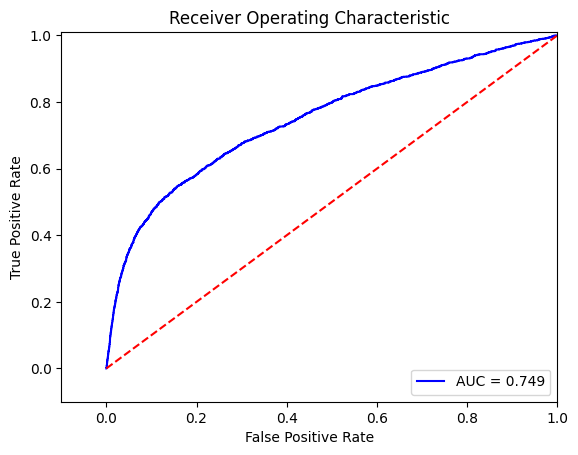

In [42]:
y_pred_sample_score = lr1.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [43]:
roc_auc

0.7492615821303519

In [44]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     10938
           1       0.36      0.48      0.41      1419

    accuracy                           0.84     12357
   macro avg       0.65      0.69      0.66     12357
weighted avg       0.86      0.84      0.85     12357



In [45]:

cnf_matrix

array([[9727, 1211],
       [ 731,  688]], dtype=int64)